In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

The @interact decorator shows a widget for controlling the arguments of a function. Here, the function f() accepts an integer as an argument. By default, the @interact decorator displays a slider to control the value passed to the function:


In [2]:
@widgets.interact
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

We can customize the slider parameters. Here, we specify a minimum and maximum integer range for the slider:


In [3]:
@widgets.interact(x=(0, 5))
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

There is also an @interact_manual decorator that provides a button to call the function manually. This is useful with long-lasting computations that should not run every time a widget value changes. Here, we create a simple user interface for controlling four parameters of a function that displays a plot. There are two floating-point sliders, a drop-down menu for choosing a value among a few predefined options, and a checkbox for Boolean values:


In [5]:
@widgets.interact_manual(color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t), lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

In addition to the @interact and @interact_manual decorators, ipywidgets provides a simple API to create individual widgets. Here, we create a floating-point slider:


In [6]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.1f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0, readout_format='.1f')

Here is an example of a slider for selecting pairs of numbers, such as intervals and ranges:


In [7]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
range_slider

FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_format='.1f')

The toggle button can control a Boolean value:


In [8]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)
grid_button

ToggleButton(value=False, description='Grid', icon='check')

Drop-down menus and toggle buttons are useful when selecting a value among a predefined set of options:


In [9]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)
color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

The text widget allows the user to write a string:


In [10]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
title_textbox

Text(value='Hello World', description='Title:')

We can let the user choose a color using the built-in system color picker:


In [11]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
color_picker

ColorPicker(value='#efefef', concise=True, description='Background color:')

We can also simply create a button:


Button(description='Plot', style=ButtonStyle())

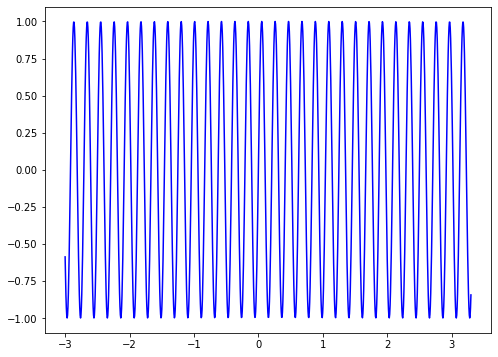

In [12]:
button = widgets.Button(
    description='Plot',
)
button

Now, we will see how to combine these widgets into a complex Graphical User Interface, and how to react to user interactions with these controls. We create a function that will display a plot as defined by the created controls. We can access the control value with the value property of the widgets:


In [13]:
def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    ax.grid(grid)

In [14]:
@button.on_click
def plot_on_click(b):
    plot2()

To display all of our widgets in a unified graphical interface, we define a layout with two tabs. The first tab shows widgets related to the plot itself, whereas the second tab shows widgets related to the styling of the plot. Each tab contains a vertical stack of widgets defined with the VBox class:


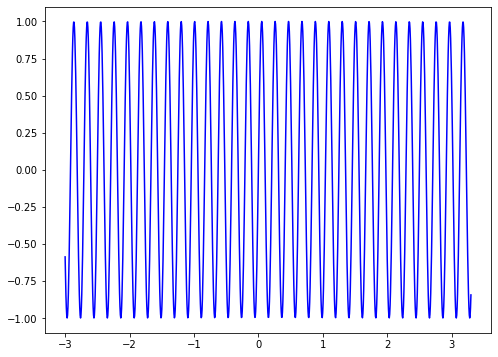

In [17]:
tab1 = VBox(children=[freq_slider, range_slider, ])
tab2 = VBox(children=[color_buttons, HBox(children=[title_textbox, color_picker, grid_button]), ])
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
VBox(children=[tab, button])